In [1]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

## Датасет

Набор данных состоит из 17 различных параметров 10000 записей

In [3]:
df = pd.read_csv('data/Skyserver_SQL2_27_2018 6_51_39 PM.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Видим, что у нас нет нулевых значений в датасете, значит, ничего заполнять не нужно

Посмотрим на описание колонок

objid = ID объекта

ra = J2000 Right Ascension (r-band)

dec = J2000 Declination (r-band)

u = better of DeV/Exp magnitude fit

g = better of DeV/Exp magnitude fit

r = better of DeV/Exp magnitude fit

i = better of DeV/Exp magnitude fit

z = better of DeV/Exp magnitude fit

run = Run Number

rereun = Rerun Number

camcol = Camera column

field = Field number

specobjid = Object Identifier

class = object class (galaxy, star or quasar object)

redshift = Final Redshift

plate = plate number

mjd = MJD of observation

fiberid = fiber ID

Колонка class у нас целевая. Поля objid, run, rerun, camcol, field, specobjid, fiberid, plate не имеют особого смысла, поэтому давайте их удалим

In [5]:
df.drop(columns=['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'fiberid', 'plate'], inplace=True)

## EDA

1. Распределение классов


<Axes: xlabel='class', ylabel='count'>

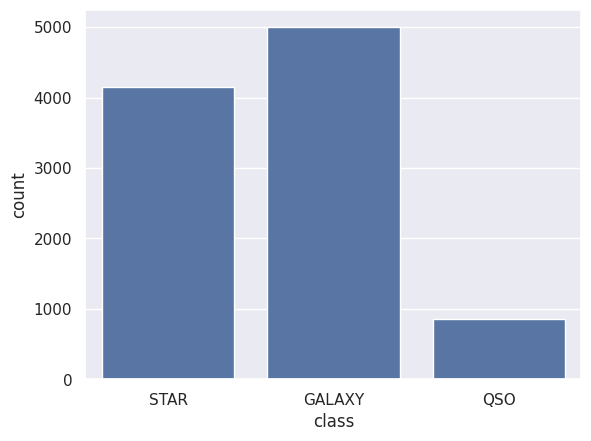

In [6]:
sns.countplot(x='class', data=df)

Видим, что данные по классам распределены неравномерно, и что больше все объектов-галактик

Построим графики распределений по всем непрерывным значениям

2. Анализ числовых данных

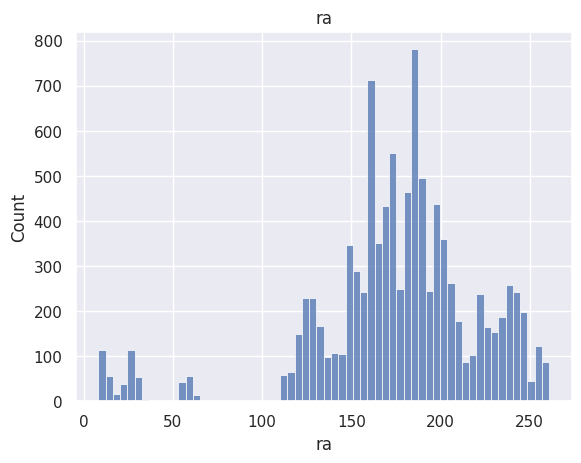

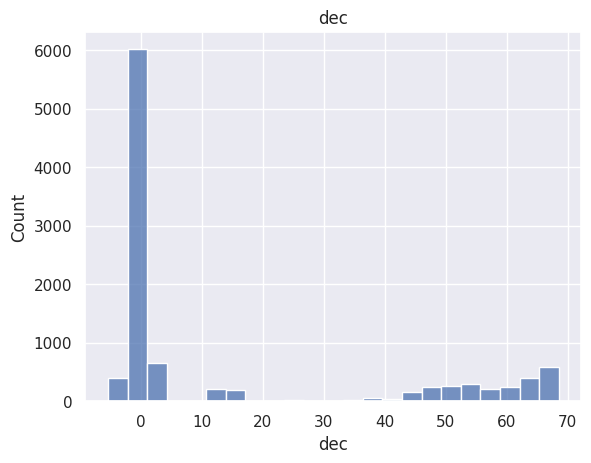

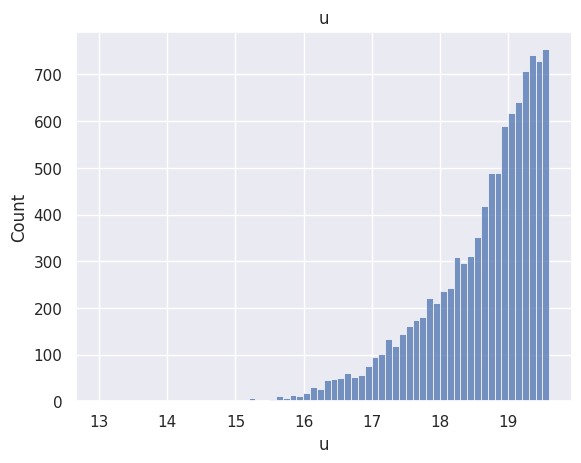

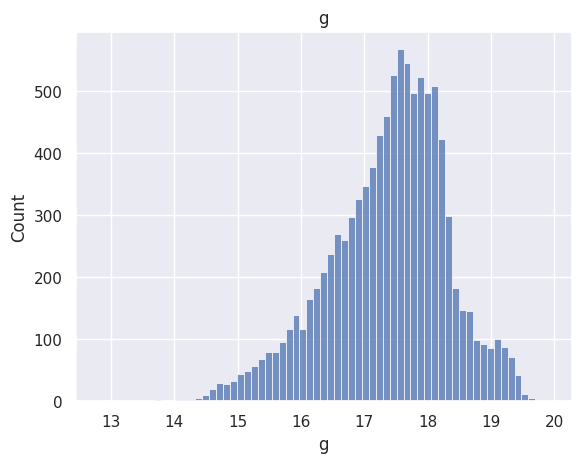

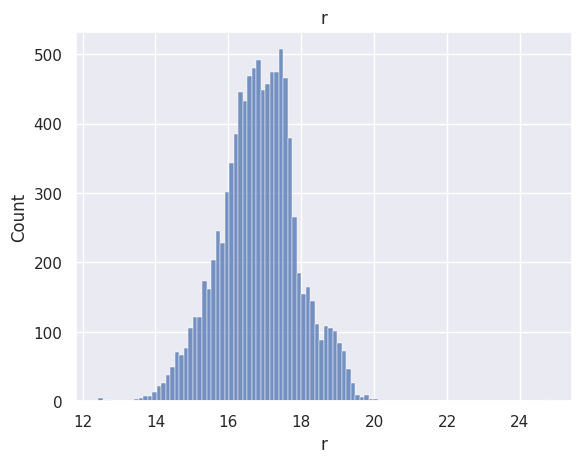

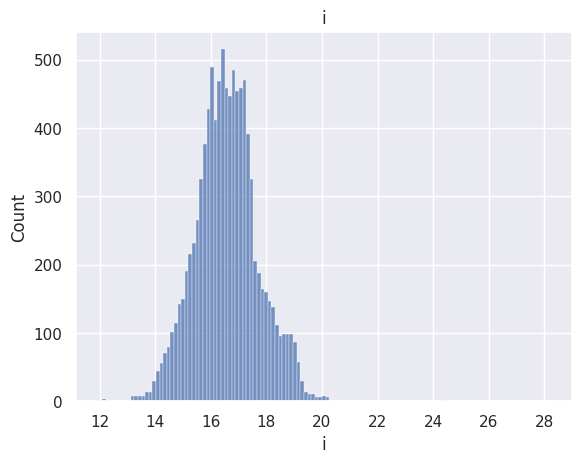

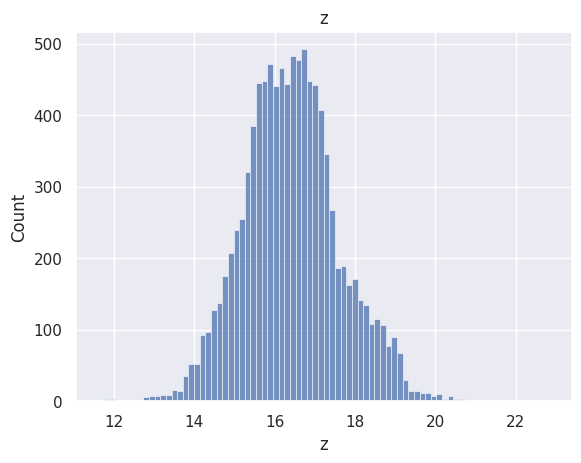

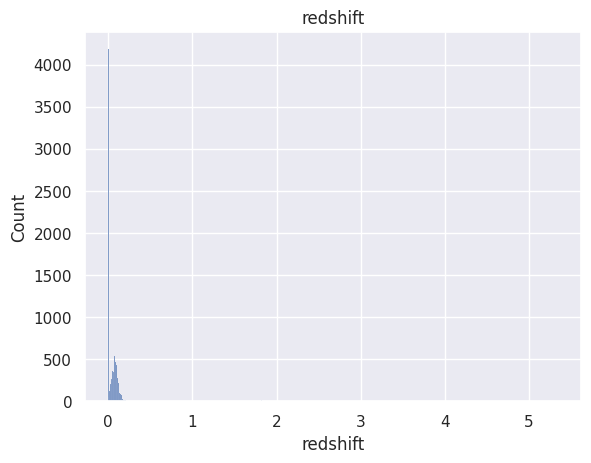

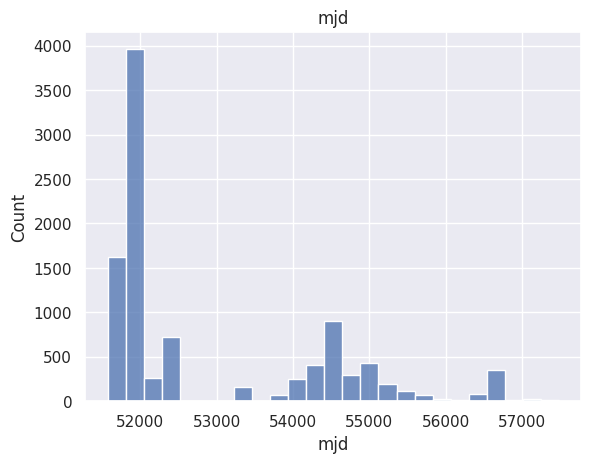

In [17]:
for column in df.select_dtypes(include=np.number).columns:
    sns.histplot(df[column]).set_title(column)
    plt.show()

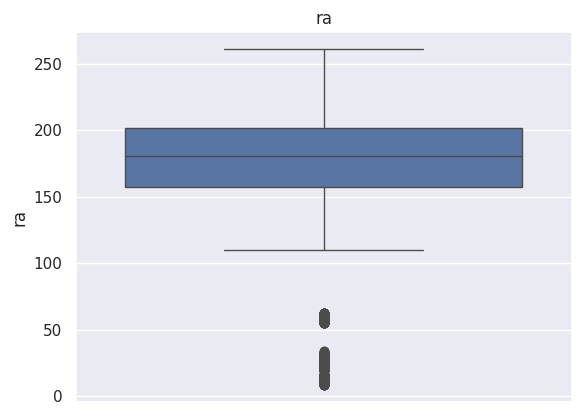

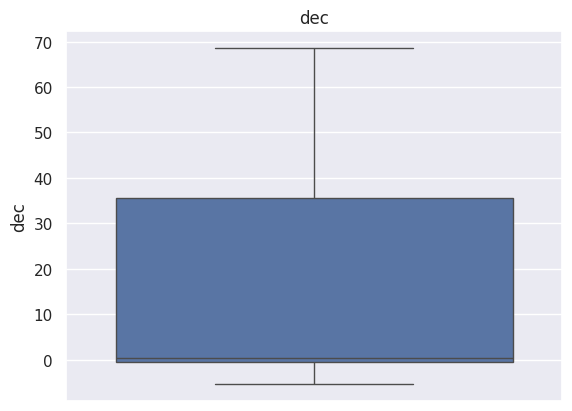

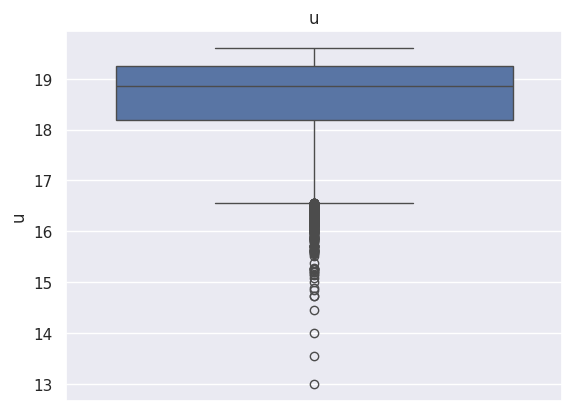

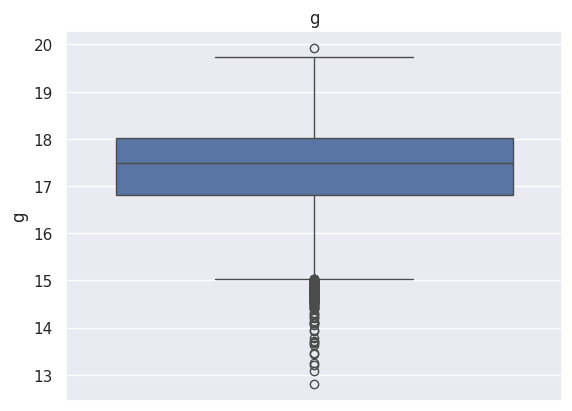

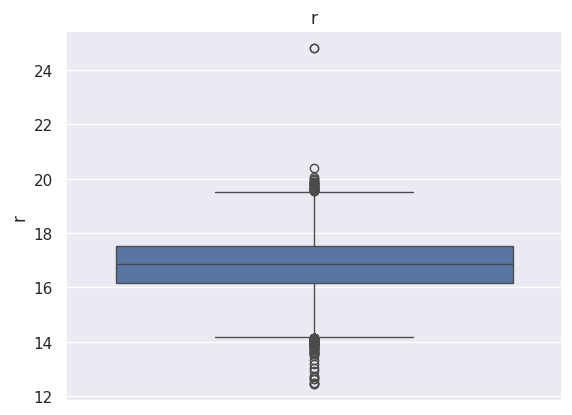

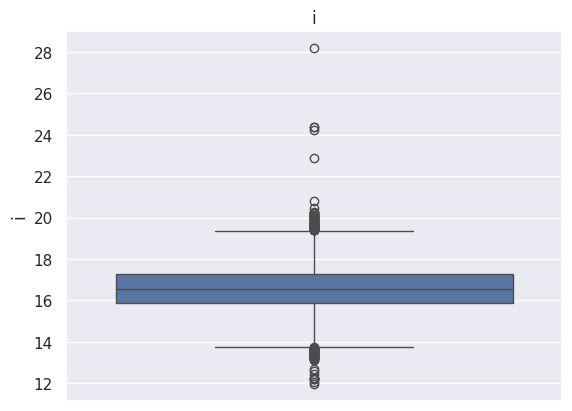

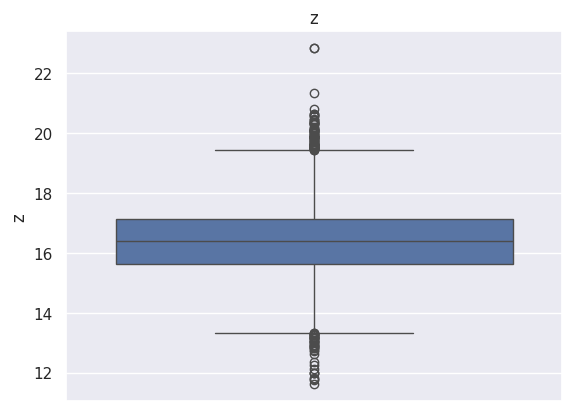

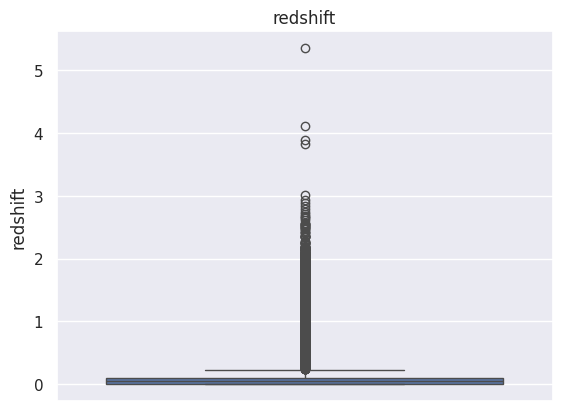

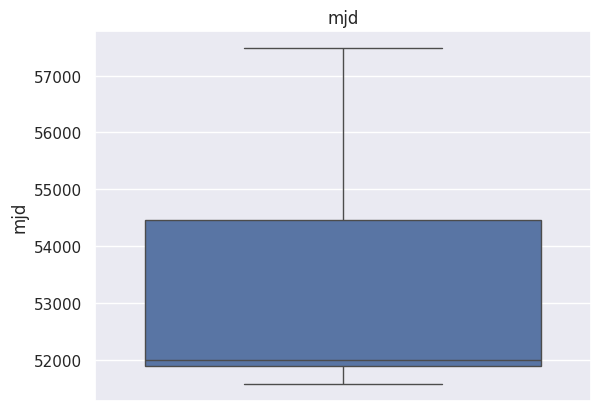

In [18]:
for column in df.select_dtypes(include=np.number).columns:
    sns.boxplot(df[column]).set_title(column)
    plt.show()

Вывод: наблюдаем большое количество выбросов у полей redshift, u, g и ra

3. Расположение объектов на небе

<Axes: xlabel='dec', ylabel='class'>

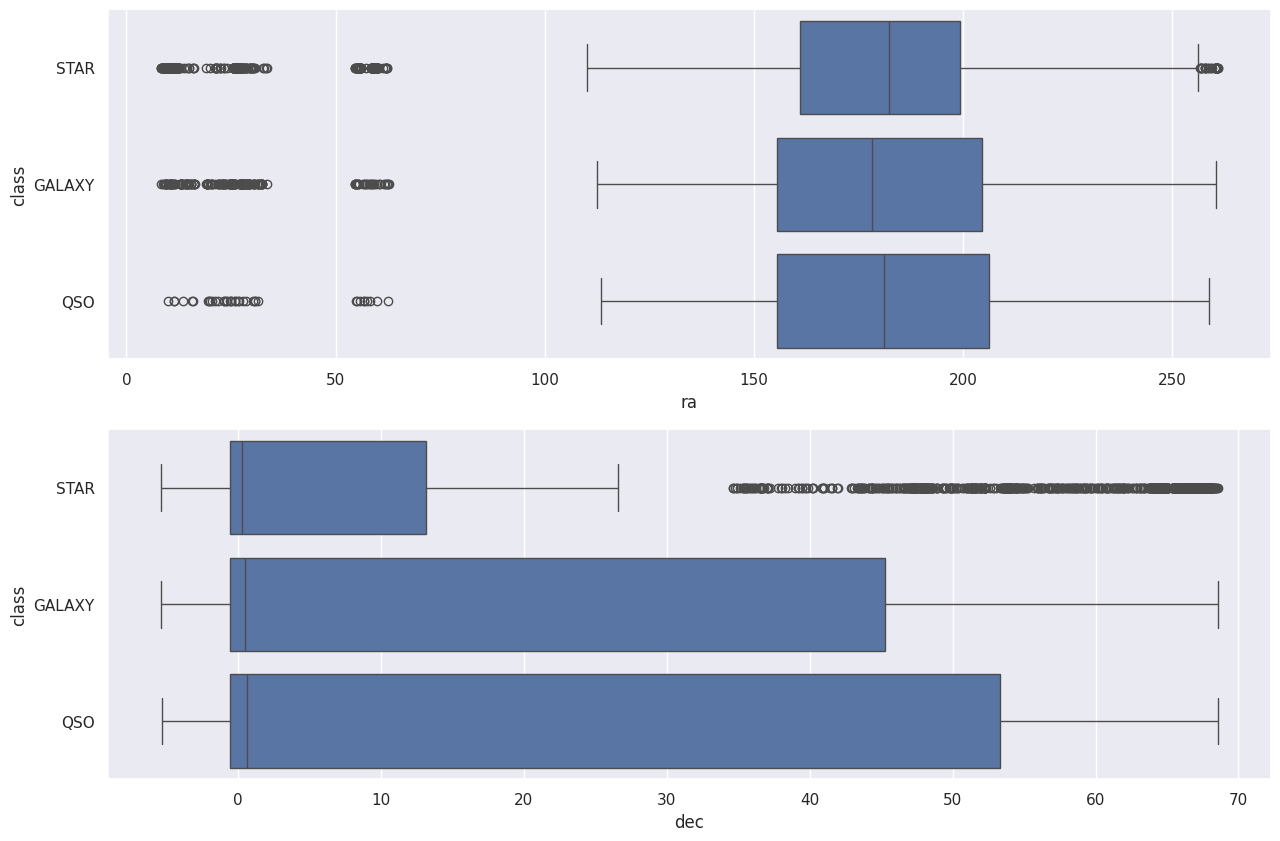

In [22]:
f, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.boxplot(y='class', x='ra', data=df, ax=axes[0])
sns.boxplot(y='class', x='dec', data=df, ax=axes[1])

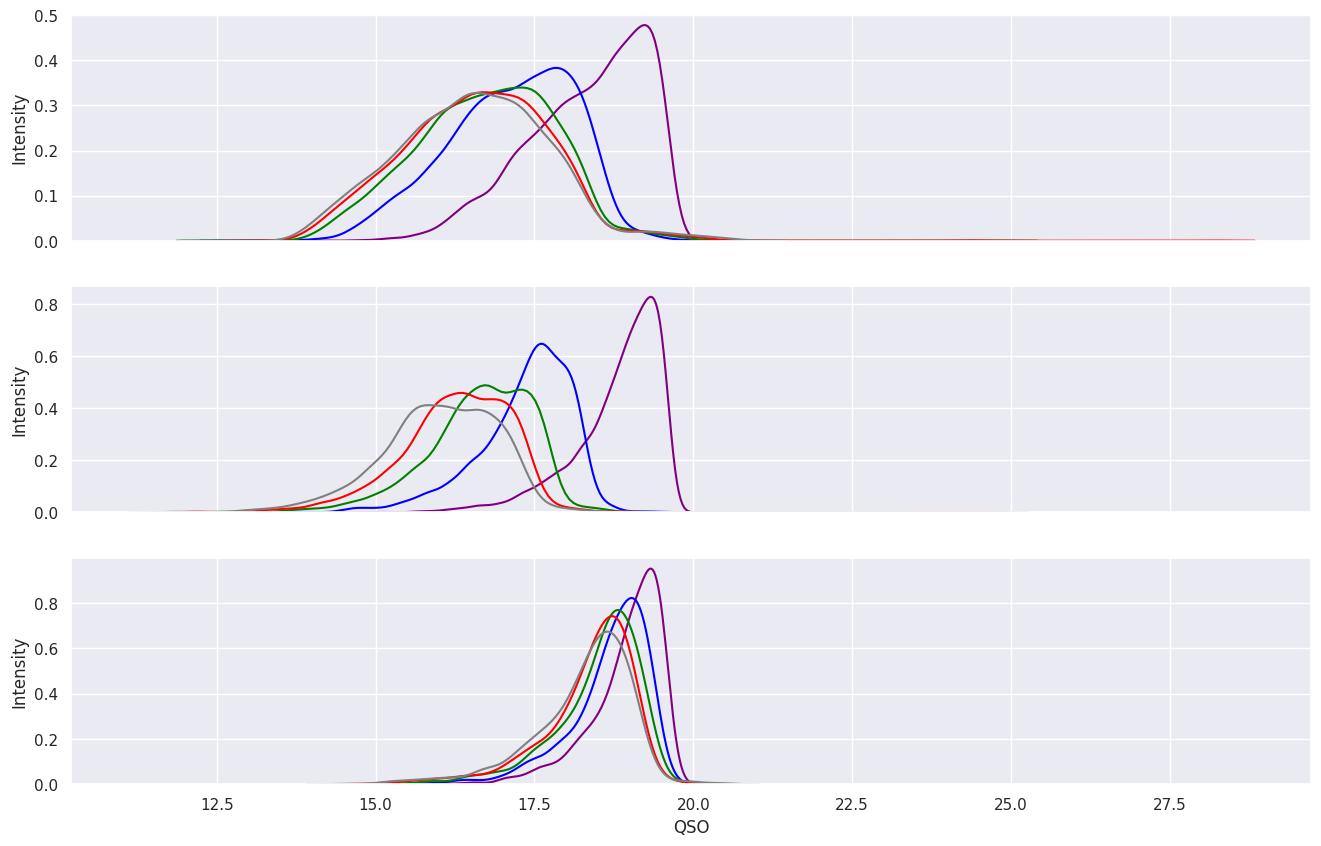

In [26]:
f, axes = plt.subplots(3, 1, figsize=(16, 10), sharex=True)
c = ['STAR', 'GALAXY', 'QSO']

for ax_id in range(3):
    sns.distplot(df.loc[df['class']==c[ax_id],'u'], hist=False, color='purple', ax=axes[ax_id], label='u')
    sns.distplot(df.loc[df['class']==c[ax_id],'g'], hist=False, color='blue', ax=axes[ax_id], label='g')
    sns.distplot(df.loc[df['class']==c[ax_id],'r'], hist=False, color='green', ax=axes[ax_id], label='r')
    sns.distplot(df.loc[df['class']==c[ax_id],'i'], hist=False, color='red', ax=axes[ax_id], label='i')
    sns.distplot(df.loc[df['class']==c[ax_id],'z'], hist=False, color='grey', ax=axes[ax_id], label='z')
    axes[ax_id].set(xlabel=c[ax_id], ylabel='Intensity')

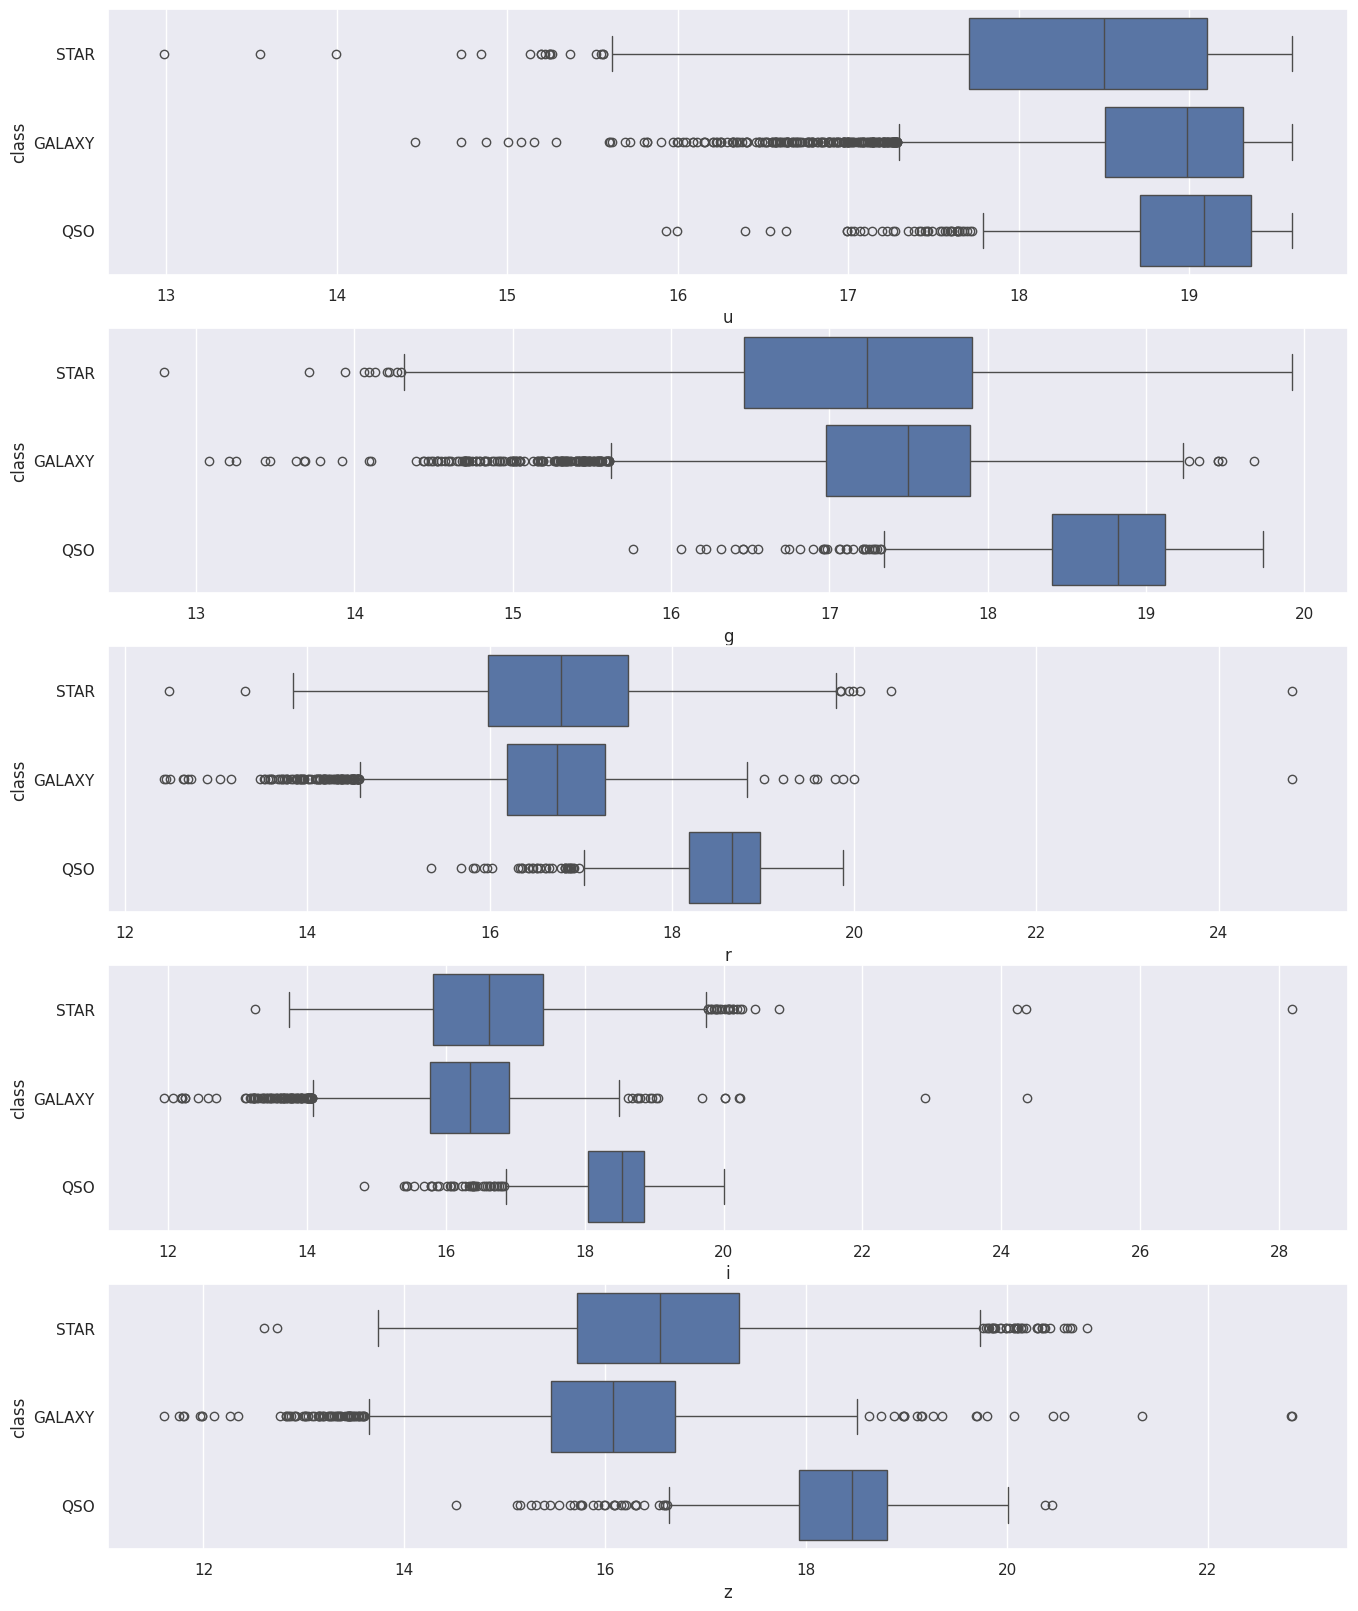

In [28]:
f, axes = plt.subplots(5, 1, figsize=(16, 20))
c = ['u','g', 'r', 'i', 'z']

for idx, cls in enumerate(c):
    sns.boxplot(y='class', x=cls, data=df, ax=axes[idx])

## Статистики

Корреляция Пирсона

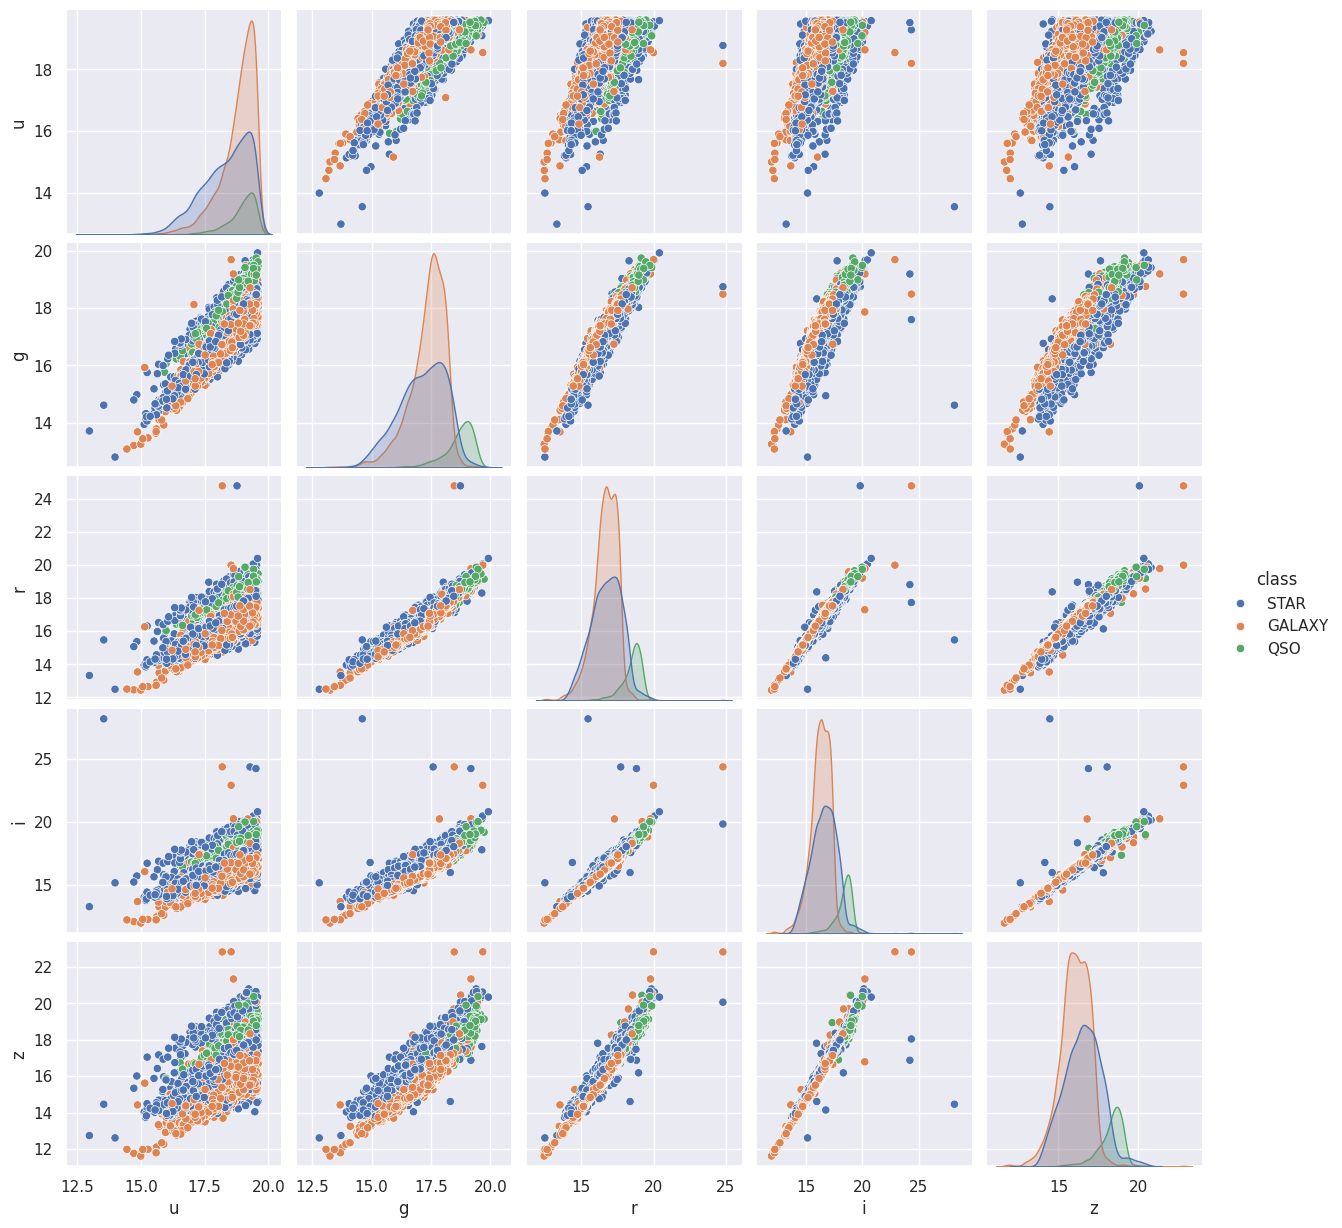

In [46]:
sns.pairplot(df.loc[:,["u", "g", "r", "i", "z", "class"]], hue = "class")

<Axes: >

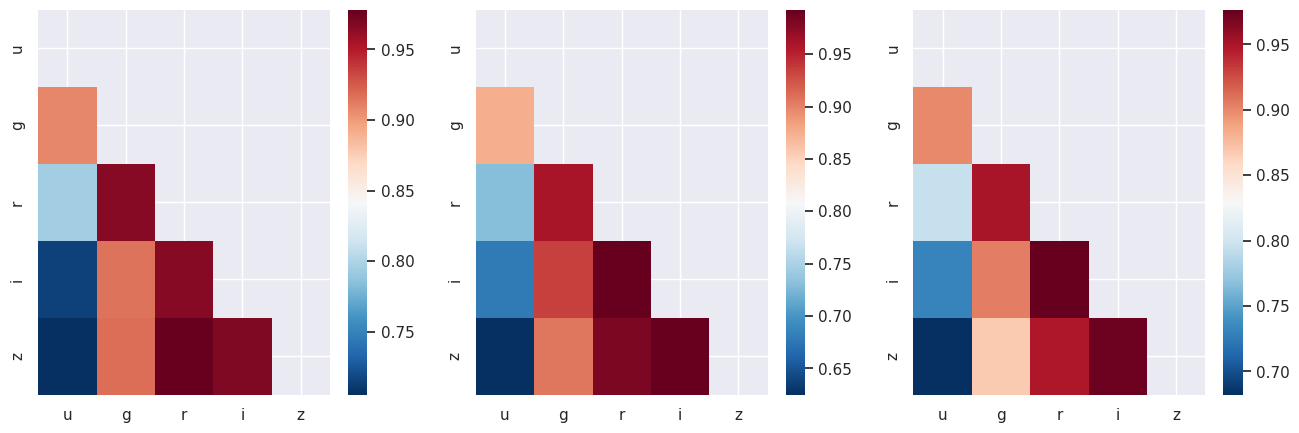

In [29]:
f, axes = plt.subplots(1, 3, figsize=(16, 5))

star_corr = df.loc[df['class']=='STAR', ['u','g','r','i','z']].corr()
galaxy_corr = df.loc[df['class']=='GALAXY', ['u','g','r','i','z']].corr()
qso_corr = df.loc[df['class']=='QSO', ['u','g','r','i','z']].corr()

msk = np.zeros_like(star_corr)
msk[np.triu_indices_from(msk)] = True

sns.heatmap(star_corr, cmap='RdBu_r', mask=msk, ax=axes[0])
sns.heatmap(galaxy_corr, cmap='RdBu_r', mask=msk, ax=axes[1])
sns.heatmap(qso_corr, cmap='RdBu_r', mask=msk, ax=axes[2])

<Axes: xlabel='ra', ylabel='dec'>

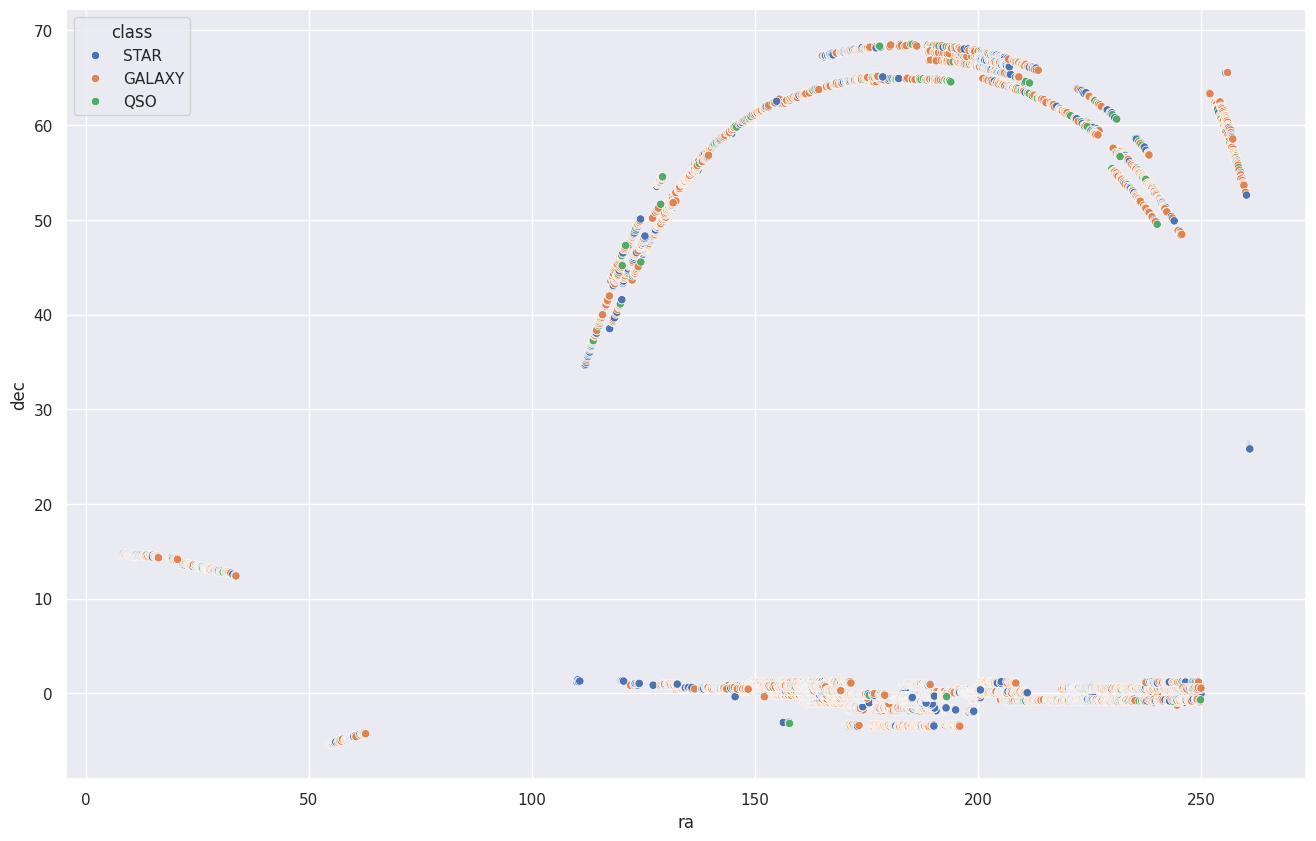

In [30]:
f, ax = plt.subplots(figsize=(16, 10))
sns.scatterplot(x='ra', y='dec', hue='class', data=df)